# Исследование надёжности заёмщиков банка

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

# Сценарий по выполнению проекта

### Шаг 1. Загрузка и изучение данных<a class="tocSkip"></a>

<b>Путь к файлу:</b>  
* <code><b>/datasets/data.csv</b></code>

Датасет содержит данные о клиентах банка.

<b>Описание данных</b>
* <code><b>children</b></code> — количество детей в семье
* <code><b>days_employed</b></code> — общий трудовой стаж в днях
* <code><b>dob_years</b></code> — возраст клиента в годах
* <code><b>education</b></code> — уровень образования клиента
* <code><b>education_id</b></code> — идентификатор уровня образования
* <code><b>family_status</b></code> — семейное положение
* <code><b>family_status_id</b></code> — идентификатор семейного положения
* <code><b>gender</b></code> — пол клиента
* <code><b>income_type</b></code> — тип занятости
* <code><b>debt</b></code> — имел ли задолженность по возврату кредитов
* <code><b>total_income</b></code> — ежемесячный доход
* <code><b>purpose</b></code> — цель получения кредита

### Шаг 2. Предобработка данных<a class="tocSkip"></a>
* 2.1.  Обработка пропусков
* 2.2.  Замена типа данных
* 2.3.  Обработка дубликатов
* 2.4.  Лемматизация и категоризация данных

### Шаг 3. Ответы на вопросы<a class="tocSkip"></a>
- 3.1.  Есть ли зависимость между наличием детей и возвратом кредита в срок?
- 3.2.  Есть ли зависимость между семейным положением и возвратом кредита в срок?
- 3.3.  Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- 3.4.  Как разные цели кредита влияют на его возврат в срок?

### Шаг 4. Общий вывод<a class="tocSkip"></a>

<hr style="border: 2px solid indigo;" />

## Шаг 1. Загрузка и изучение данных

<b>Путь к файлу:</b>  
* <code><b>/datasets/data.csv</b></code>

Датасет содержит данные о клиентах банка.

<b>Описание данных</b>
* <code><b>children</b></code> — количество детей в семье
* <code><b>days_employed</b></code> — общий трудовой стаж в днях
* <code><b>dob_years</b></code> — возраст клиента в годах
* <code><b>education</b></code> — уровень образования клиента
* <code><b>education_id</b></code> — идентификатор уровня образования
* <code><b>family_status</b></code> — семейное положение
* <code><b>family_status_id</b></code> — идентификатор семейного положения
* <code><b>gender</b></code> — пол клиента
* <code><b>income_type</b></code> — тип занятости
* <code><b>debt</b></code> — имел ли задолженность по возврату кредитов
* <code><b>total_income</b></code> — ежемесячный доход
* <code><b>purpose</b></code> — цель получения кредита

Загрузим необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from pymystem3 import Mystem
from collections import Counter
m = Mystem()

Загрузим датасет <code><b>data_project_1</b></code> и ознакомимся с данными.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1</b></code> — данные о клиентах банка
</div>

In [2]:
data_project_1 = pd.read_csv('data.csv')
data_project_1.is_copy = False
data_project_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
display(data_project_1.columns)

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

В базе данных есть пропуски, всего 21525 строк, названия столбцов и их регистр в порядке.

In [4]:
display(data_project_1.head(5))
display(data_project_1.tail(5))
display(data_project_1.sample(5))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
11556,1,-1337.710105,35,среднее,1,женат / замужем,0,F,сотрудник,0,89051.668712,операции с жильем
9932,0,-3991.235149,41,СРЕДНЕЕ,1,Не женат / не замужем,4,M,компаньон,0,133390.590519,на покупку своего автомобиля
16639,0,-1484.659219,44,высшее,0,Не женат / не замужем,4,F,сотрудник,0,228711.727029,строительство собственной недвижимости
21027,2,-4518.581668,50,высшее,0,Не женат / не замужем,4,M,госслужащий,0,181268.643621,покупка жилья для семьи
6777,0,NaN,46,среднее,1,Не женат / не замужем,4,F,сотрудник,0,NaN,сделка с подержанным автомобилем


Посчитаем количество пропусков и в каком они формате.

In [5]:
pd.concat([data_project_1.dtypes, data_project_1.isna().sum()], axis=1)

,0,1
children,int64,0
days_employed,float64,2174
dob_years,int64,0
education,object,0
education_id,int64,0
family_status,object,0
family_status_id,int64,0
gender,object,0
income_type,object,0
debt,int64,0


Всего пропусков обнаружено в 2174 строках и только в двух столбцах <code><b>days_employed</b></code> и <code><b>total_income</b></code> (формат данных float64)

Посмотрим отдельно уникальные значения по каждому столбцу.

In [6]:
# создадим простейшую функцию проверки уникальных значений
def display_unique(data, column):
    display(data[column].unique())
    print('Всего уникальных значений:', len(data[column].unique()))

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['children']</b></code> — количество детей в семье
</div>

In [7]:
display_unique(data_project_1, 'children')

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

Всего уникальных значений: 8


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['days_employed']</b></code> — общий трудовой стаж в днях
</div>

In [8]:
display_unique(data_project_1, 'days_employed')

# если данные в столбце указанны в днях, тогда попробуем преобразовать из количества дней в количество лет
display((abs(data_project_1["days_employed"])/365).describe())
print('Значение days_employed больше 0:', data_project_1[data_project_1['days_employed'] < 0]['days_employed'].count())
print('Значение days_employed меньше либо равно 0:', data_project_1[data_project_1['days_employed'] >= 0]['days_employed']\
      .count())
display(data_project_1[data_project_1['days_employed'] >= 0]['days_employed'].apply(lambda x: x / 365).describe())
print('Выявленные пропуски составляют: {:.1%}'\
      .format(len(data_project_1[data_project_1["days_employed"].isnull()]) / len(data_project_1)), 'от всей базы данных')

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

Всего уникальных значений: 19352


count    19351.000000
mean       183.328024
std        380.906522
min          0.066141
25%          2.539751
50%          6.011563
75%         15.172281
max       1100.699727
Name: days_employed, dtype: float64

Значение days_employed больше 0: 15906
Значение days_employed меньше либо равно 0: 3445


count    3445.000000
mean     1000.011808
std        57.739771
min       900.626632
25%       949.697024
50%      1000.584401
75%      1049.990258
max      1100.699727
Name: days_employed, dtype: float64

Выявленные пропуски составляют: 10.1% от всей базы данных


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['dob_years']</b></code> — возраст клиента в годах
</div>

In [9]:
display_unique(data_project_1, 'dob_years')
print('Минимальный возраст заёмщика: {:.0f}' .format(data_project_1['dob_years'].min()))
print('Максимальный возраст заёмщика: {:.0f}' .format(data_project_1['dob_years'].max()))
print('Всего не корретных значений "0": {:.0f}' .format(data_project_1[data_project_1['dob_years'] == 0]['dob_years'].count()))

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

Всего уникальных значений: 58
Минимальный возраст заёмщика: 0
Максимальный возраст заёмщика: 75
Всего не корретных значений "0": 101


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['education']</b></code> — уровень образования клиента
</div>

In [10]:
display_unique(data_project_1, 'education')

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Всего уникальных значений: 15


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['education_id']</b></code> — идентификатор уровня образования
</div>

In [11]:
display_unique(data_project_1, 'education_id')

array([0, 1, 2, 3, 4], dtype=int64)

Всего уникальных значений: 5


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['family_status']</b></code> — семейное положение
</div>

In [12]:
display_unique(data_project_1, 'family_status')

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Всего уникальных значений: 5


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['family_status_id']</b></code> — идентификатор семейного положения
</div>

In [13]:
display_unique(data_project_1, 'family_status_id')

array([0, 1, 2, 3, 4], dtype=int64)

Всего уникальных значений: 5


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['gender']</b></code> — пол клиента
</div>

In [14]:
display_unique(data_project_1, 'gender')
display(data_project_1[data_project_1['gender'] == 'XNA'])

array(['F', 'M', 'XNA'], dtype=object)

Всего уникальных значений: 3


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['income_type']</b></code> — тип занятости
</div>

In [15]:
display_unique(data_project_1, 'income_type')

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Всего уникальных значений: 8


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['debt']</b></code> — имел ли задолженность по возврату кредитов
</div>

In [16]:
display_unique(data_project_1, 'debt')

array([0, 1], dtype=int64)

Всего уникальных значений: 2


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['total_income']</b></code> — ежемесячный доход
</div>

In [17]:
display_unique(data_project_1, 'total_income')
print('Выявленные пропуски составляют: {:.1%}'.format(len(data_project_1[data_project_1["total_income"]\
                                              .isnull()]) / len(data_project_1)), 'от всей базы данных')

array([253875.6394526 , 112080.01410244, 145885.95229686, ...,
        89672.56115303, 244093.05050043,  82047.41889948])

Всего уникальных значений: 19352
Выявленные пропуски составляют: 10.1% от всей базы данных


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['purpose']</b></code> — цель получения кредита
</div>

In [18]:
display_unique(data_project_1, 'purpose')

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Всего уникальных значений: 38


Посмотрим на данные всех столбцов через функцию <code><b>.describe()</b></code>

In [19]:
display(data_project_1.describe(include='all'))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,1.935100e+04,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,среднее,NaN,женат / замужем,NaN,F,сотрудник,NaN,NaN,свадьба
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,1.674223e+05,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,1.029716e+05,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,2.066726e+04,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.030532e+05,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.450179e+05,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,2.034351e+05,NaN


<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
Выше изучив данные <code><b>data_project_1</b></code> в том числе по столбцам, обращаем внимание на:
<br>
    
- в датасете <code><b>data_project_1</b></code> - 21525 строк и 12 столбцов;<br>
- <code><b>data_project_1.columns</b></code> - все названия столбцов корректные;<br>    
- <code><b>data_project_1['days_employed']</b></code> - выявлено 2174 пропусков;<br>
- <code><b>data_project_1['total_income']</b></code> - заменить тип данных (float64 на int64)<br>
- <code><b>data_project_1['dob_years']</b></code> - заменить тип данных (float64 на int64)<br>    
- <code><b>data_project_1['days_employed']</b></code> - заменить тип данных (float64 на int64)<br>    
- <code><b>data_project_1['days_employed']</b></code> - выявлены отрицательные значения и возможно не корректный формат заполнения (указано кол-во часов вместо кол-во дней). Гипотеза - это числовое обозначение дат относительно 1970 года (вот почему есть отрицательные значения);<br>
- <code><b>data_project_1['total_income']</b></code> - выявлено 2174 пропусков;<br>    
- <code><b>data_project_1['children']</b></code> - выявлено отрицательное значение (-1) и возможно не корректный выброс (20);<br>
- <code><b>data_project_1['gender']</b></code> - выявлено не корректное значение XNA;<br>
- <code><b>data_project_1['education']</b></code> - выявлены не корректные регистры, значения задвоенны / затроенны. Необходимо привести категоризацию к 5 значениям (начальное, среднее, неоконченное высшее, высшее, ученая степень);<br>
- <code><b>data_project_1['dob_years']</b></code> - выявлено не корректное значение 0 лет;<br>    
- <code><b>data_project_1['purpose']</b></code> - выявлена хаотичность значений в списке. Выполнить единую категоризацию;<br> 
- <code><b>data_project_1['education_id']</b></code> - данные корректны;<br> 
- <code><b>data_project_1['family_status']</b></code> - данные корректны;<br>    
- <code><b>data_project_1['family_status_id']</b></code> - данные корректны;<br>    
- <code><b>data_project_1['income_type']</b></code> - данные корректны;<br> 
- <code><b>data_project_1['debt']</b></code> - данные корректны.<br>     
    
</div>

<hr style="border: 2px solid indigo;" />

## Шаг 2. Предобработка данных<a class="tocSkip"></a>
* 2.1.  Обработка пропусков
* 2.2.  Замена типа данных
* 2.3.  Обработка дубликатов
* 2.4.  Лемматизация и категоризация данных

### 2.1. Обработка пропусков

<code><b>data_project_1['children']</b></code> - заменим ошибочные значения '<code><b>20</b></code>' и '<code><b>-1</b></code>' на '<code><b>2</b></code>' и '<code><b>1</b></code>'.

In [20]:
data_project_1['children'] = data_project_1['children'].replace(20, 2)
data_project_1['children'] = data_project_1['children'].replace(-1, 1)
display(data_project_1['children'].unique())

array([1, 0, 3, 2, 4, 5], dtype=int64)

<code><b>data_project_1['gender']</b></code> - исключим из выборки выявленное не корректное значение ('<code><b>XNA</b></code>').

In [21]:
data_project_1 = data_project_1[data_project_1['gender'] != 'XNA']
print('Количество строк в столбце gender со значением XNA: {:.0f}'\
      .format(data_project_1[data_project_1['gender'] == 'XNA']['gender'].count()))

Количество строк в столбце gender со значением XNA: 0


<code><b>data_project_1['education']</b></code> - приведем все значения в столбце к одному регистру.

In [22]:
data_project_1['education'] = data_project_1['education'].str.lower()
display(data_project_1['education'].unique())

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

<code><b>data_project_1['dob_years']</b></code> - исправим нулевые значения.

Вычислим медиану по каждому типу занятости.

In [23]:
display(data_project_1.groupby('income_type')['dob_years'].median())

income_type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.5
сотрудник          39.0
студент            22.0
Name: dob_years, dtype: float64

Используя функцию .loc, фильтуруем данные в столбце <code><b>dob_years</b></code> со значением '<code><b>0</b></code>' и заменим на медианы полученные выше.

In [24]:
data_project_1.is_copy = False
data_project_1.loc[(data_project_1['income_type'] == 'пенсионер') & (data_project_1['dob_years'] == 0),'dob_years'] = 60
data_project_1.loc[(data_project_1['income_type'] == 'студент') & (data_project_1['dob_years'] == 0),'dob_years'] = 22
data_project_1.loc[(data_project_1['income_type'] == 'сотрудник') & (data_project_1['dob_years'] == 0),'dob_years'] = 39
data_project_1.loc[(data_project_1['income_type'] == 'предприниматель') & (data_project_1['dob_years'] == 0),'dob_years'] = 42.5
data_project_1.loc[(data_project_1['income_type'] == 'компаньон') & (data_project_1['dob_years'] == 0),'dob_years'] = 39
data_project_1.loc[(data_project_1['income_type'] == 'госслужащий') & (data_project_1['dob_years'] == 0),'dob_years'] = 40
data_project_1.loc[(data_project_1['income_type'] == 'в декрете') & (data_project_1['dob_years'] == 0),'dob_years'] = 39
data_project_1.loc[(data_project_1['income_type'] == 'безработный ') & (data_project_1['dob_years'] == 0),'dob_years'] = 38

print('Количество строк в столбце dob_years со значением 0 лет: {:.0f}'\
      .format(data_project_1[data_project_1['dob_years'] == 0]['dob_years'].count()))

display_unique(data_project_1, 'dob_years')

Количество строк в столбце dob_years со значением 0 лет: 0


array([42., 36., 33., 32., 53., 27., 43., 50., 35., 41., 40., 65., 54.,
       56., 26., 48., 24., 21., 57., 67., 28., 63., 62., 47., 34., 68.,
       25., 31., 30., 20., 49., 37., 45., 61., 64., 44., 52., 46., 23.,
       38., 39., 51., 60., 59., 29., 55., 58., 71., 22., 73., 66., 69.,
       19., 72., 70., 74., 75.])

Всего уникальных значений: 57


Посмотрим на распределение значений возраста клиентов на графике <code><b>.hist()</b></code>.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['dob_years'].hist()</b></code> — гистограмма распределения клиентов по возрасту
</div>

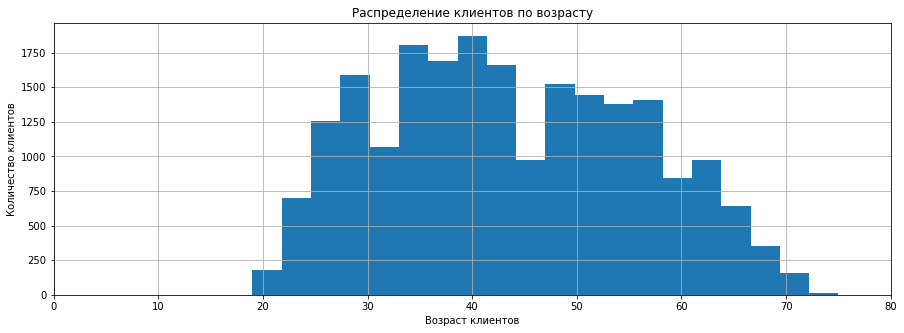

In [25]:
# построим гистограмму
data_project_1['dob_years'].hist(bins=20, figsize=(15, 5))
plt.xlabel('Возраст клиентов')  
plt.ylabel('Количество клиентов')  
plt.title('Распределение клиентов по возрасту')
plt.xlim(0, 80)
plt.show()

<code><b>data_project_1['days_employed']</b></code> - исправим '<code><b>2174</b></code>' пропусков '<code><b>NaN</b></code>', заменив на '<code><b>0</b></code>'.

Таким образом мы сохраним репрезентативность выборки, а далее сможем заменить нулевые значения на специально подобранные.

In [26]:
data_project_1['days_employed'] = data_project_1['days_employed'].fillna(0)
display(data_project_1.isnull().sum())

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

<code><b>data_project_1['total_income']</b></code> - исправим '<code><b>2174</b></code>' пропусков '<code><b>NaN</b></code>', заменив на '<code><b>0</b></code>'.

Таким образом мы сохраним репрезентативность выборки, а далее сможем заменить нулевые значения на специально подобранные.

In [27]:
data_project_1['total_income'] = data_project_1['total_income'].fillna(0)
display(data_project_1.isnull().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

<code><b>data_project_1['days_employed']</b></code> - теперь дозаполним ранее пропущенные значения, которые мы временно заменили на ноль.

Для заполнения пропущенных значений в столбце <code><b>days_employed</b></code>, создадим новый столбец <code><b>age_group</b></code> с возрастными группами и вычислим по каждой среднее значение.

Выборку поделим на 4 группы:
* 1 группа: 19 - 30 (включительно);
* 2 группа: 30 - 40 (включительно);
* 3 группа: 40 - 55 (включительно);
* 4 группа: 55 - 75.

In [28]:
# cоздадим функцию для ранжирования возрастных групп
def days_employed(row):
    age = row['dob_years']

    if age <= 30:
        return '1 группа: (19 - 30)'
    
    if age <= 40 and age > 30:
        return '2 группа: (30 - 40)'
    
    if age <= 55 and age > 40:
        return '3 группа: (40 - 55)'
    
    if age <= 75 and age > 55:
        return '4 группа: (55 - 75)'

Создадим дополнительный столбец <code><b>age_group</b></code> с 4 возможными значениями (группами).

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['age_group']</b></code> — возрастные группы
</div>

In [29]:
data_project_1['age_group'] = data_project_1.apply(days_employed, axis=1)
display(data_project_1.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,-8437.673028,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,3 группа: (40 - 55)
1,1,-4024.803754,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,2 группа: (30 - 40)
2,0,-5623.422610,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,2 группа: (30 - 40)
3,3,-4124.747207,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,2 группа: (30 - 40)
4,0,340266.072047,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,3 группа: (40 - 55)


Cоздадим переменную <code><b>age_group_mean</b></code> и поместим в неё сгруппированные данные для вычисления средней.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>age_group_mean</b></code> — средние значения возраста клиентов по группам
</div>

In [30]:
age_group_mean = data_project_1.groupby('age_group')['days_employed'].mean()
display(age_group_mean)

age_group
1 группа: (19 - 30)      -475.859004
2 группа: (30 - 40)       451.034791
3 группа: (40 - 55)     34261.456312
4 группа: (55 - 75)    218534.805989
Name: days_employed, dtype: float64

Сгруппируем данные по <code><b>age_group</b></code> и <code><b>days_employed</b></code> = '<code><b>0</b></code>' и подставим средние значения <code><b>age_group_mean</b></code> согласно созданным возрастным группам.

In [31]:
data_project_1.loc[(data_project_1['age_group'] == '1 группа: (19 - 30)') & (data_project_1['days_employed'] == 0 )\
                   , 'days_employed'] = age_group_mean[0]
data_project_1.loc[(data_project_1['age_group'] == '2 группа: (30 - 40)') & (data_project_1['days_employed'] == 0 )\
                   , 'days_employed'] = age_group_mean[1]
data_project_1.loc[(data_project_1['age_group'] == '3 группа: (40 - 55)') & (data_project_1['days_employed'] == 0 )\
                   , 'days_employed'] = age_group_mean[2]
data_project_1.loc[(data_project_1['age_group'] == '4 группа: (55 - 75)') & (data_project_1['days_employed'] == 0 )\
                   , 'days_employed'] = age_group_mean[3]

print('Выявлено нулевых значений days_employed: {:.0f}'.format(len(data_project_1[data_project_1['days_employed'] == 0])))

Выявлено нулевых значений days_employed: 0


<code><b>data_project_1['total_income']</b></code> - теперь дозаполним ранее пропущенные значения, которые мы временно заменили на ноль.

Cоздадим переменную <code><b>income_type_median</b></code> и поместим в неё сгруппированные данные для вычисления медианы.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>income_type_median</b></code> — медианные значения ежемесячного дохода клиентов по типу занятости
</div>

In [32]:
income_type_median = data_project_1.groupby('income_type')['total_income'].median()
display(income_type_median)

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        139034.452386
компаньон          162379.674930
пенсионер          110179.690761
предприниматель    249581.572474
сотрудник          133546.457238
студент             98201.625314
Name: total_income, dtype: float64

Сгруппируем данные по <code><b>income_type</b></code> и <code><b>total_income</b></code> = '<code><b>0</b></code>' и подставим медианные значения <code><b>income_type_median</b></code> согласно посчитанным данным по типу занятости.

In [33]:
data_project_1.loc[(data_project_1['total_income'] == 0) & (data_project_1['income_type'] == 'безработный'),'total_income']\
= income_type_median[0]
data_project_1.loc[(data_project_1['total_income'] == 0) & (data_project_1['income_type'] == 'в декрете'),'total_income']\
= income_type_median[1]
data_project_1.loc[(data_project_1['total_income'] == 0) & (data_project_1['income_type'] == 'госслужащий'),'total_income']\
= income_type_median[2]
data_project_1.loc[(data_project_1['total_income'] == 0) & (data_project_1['income_type'] == 'компаньон'),'total_income']\
= income_type_median[3]
data_project_1.loc[(data_project_1['total_income'] == 0) & (data_project_1['income_type'] == 'пенсионер'),'total_income']\
= income_type_median[4]
data_project_1.loc[(data_project_1['total_income'] == 0) & (data_project_1['income_type'] == 'предприниматель'),'total_income']\
= income_type_median[5]
data_project_1.loc[(data_project_1['total_income'] == 0) & (data_project_1['income_type'] == 'сотрудник'),'total_income']\
= income_type_median[6]
data_project_1.loc[(data_project_1['total_income'] == 0) & (data_project_1['income_type'] == 'студент'),'total_income']\
= income_type_median[7]

print('Выявлено нулевых значений total_income: {:.0f}'.format(len(data_project_1[data_project_1['total_income'] == 0])))

Выявлено нулевых значений total_income: 0


Поделим нашу выборку на 4 группы по уровню дохода:
* 1 группа: 15K - 55K (включительно);
* 2 группа: 55K - 120K (включительно);
* 3 группа: 120K - 200K (включительно);
* 4 группа: 200K - 3000K.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_project_1['total_income_group']</b></code> — группировка клиентов по уровню дохода
</div>

In [34]:
# cоздадим функцию для ранжирования групп по ежемесячному доходу
def income_group(row):
    
    income = row['total_income']

    if income <= 55000:
        return '15K - 55K'
    
    if income <= 120000 and income > 55000:
        return '55K - 120K'
    
    if income <= 200000 and income > 120000:
        return '120K - 200K'
    
    if income <= 3000000 and income > 200000:
        return '200K - 3000K'

In [35]:
data_project_1['total_income_group'] = data_project_1.apply(income_group, axis=1)
display(data_project_1.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,total_income_group
0,1,-8437.673028,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,3 группа: (40 - 55),200K - 3000K
1,1,-4024.803754,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,2 группа: (30 - 40),55K - 120K
2,0,-5623.422610,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,2 группа: (30 - 40),120K - 200K
3,3,-4124.747207,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,2 группа: (30 - 40),200K - 3000K
4,0,340266.072047,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,3 группа: (40 - 55),120K - 200K


### 2.2. Замена типа данных

Заменим типы данных столбцов <code><b>total_income</b></code>, <code><b>dob_years</b></code> и <code><b>days_employed</b></code> с <code><b>float</b></code> на <code><b>int</b></code>. 

In [36]:
data_project_1['total_income'] = data_project_1['total_income'].astype('int64')
data_project_1['dob_years'] = data_project_1['dob_years'].astype('int64')
data_project_1['days_employed'] = data_project_1['days_employed'].astype('int64')
data_project_1['days_employed'] = abs(data_project_1['days_employed'])
display(data_project_1.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,total_income_group
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,3 группа: (40 - 55),200K - 3000K
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,2 группа: (30 - 40),55K - 120K
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,2 группа: (30 - 40),120K - 200K
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,2 группа: (30 - 40),200K - 3000K
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,3 группа: (40 - 55),120K - 200K


### 2.3. Обработка дубликатов

Проверим данные на предмет дубликатов.

In [37]:
display(data_project_1.duplicated().sum())

71

Удалим дубликаты используя метод <code><b>.drop_duplicates()</b></code> с новой индексацией

In [38]:
data_project_1 = data_project_1.drop_duplicates().reset_index(drop=True)
display(data_project_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   children            21453 non-null  int64 
 1   days_employed       21453 non-null  int64 
 2   dob_years           21453 non-null  int64 
 3   education           21453 non-null  object
 4   education_id        21453 non-null  int64 
 5   family_status       21453 non-null  object
 6   family_status_id    21453 non-null  int64 
 7   gender              21453 non-null  object
 8   income_type         21453 non-null  object
 9   debt                21453 non-null  int64 
 10  total_income        21453 non-null  int64 
 11  purpose             21453 non-null  object
 12  age_group           21453 non-null  object
 13  total_income_group  21453 non-null  object
dtypes: int64(7), object(7)
memory usage: 2.3+ MB


None

### 2.4. Лемматизация и категоризация данных

Лемматизируем столбец <code><b>purpose</b></code> и на его основе создадим новый столбец с категориями <code><b>purpose_category</b></code>.

In [39]:
estate = ['недвижим', 'жиль']
wedding = ['свадьб']
auto = ['автомоб']
education = ['образова']

data_project_1['purpose_category'] = 0
def categoryzer(list_of_words, category):
  join = '|'.join(list_of_words)
  index = data_project_1[data_project_1['purpose'].str.lower().str.contains(join)].index.to_list()
  for i in index:
    data_project_1.loc[i, 'purpose_category'] = category
  return data_project_1

categoryzer(wedding, 'свадьба')
categoryzer(estate, 'недвижимость')
categoryzer(auto, 'авто')
categoryzer(education, 'образование')

Counter(data_project_1['purpose_category'])
display(data_project_1.head())

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,total_income_group,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,3 группа: (40 - 55),200K - 3000K,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,2 группа: (30 - 40),55K - 120K,авто
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,2 группа: (30 - 40),120K - 200K,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,2 группа: (30 - 40),200K - 3000K,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,3 группа: (40 - 55),120K - 200K,свадьба


<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
Выше мы успешно произвели предобработку данных датасета <code><b>data_project_1</b></code> и далее поэтапно её распишем.
<br>
    
<b>1. Обработка пропусков:</b><br>
- <code><b>children</b></code> - заменили не корректные значения -1 на 1 и 20 на 2;<br>
- <code><b>gender</b></code> - удалили не корректную строку со значением XNA;<br>
- <code><b>education</b></code> - привели все значения к одному регистру, сократив кол-во значений до 5;<br>
- <code><b>dob_years</b></code> - выявили и исправили 101 не корректное значение, заменив на медианное значение относительно типа занятости;<br>
- <code><b>days_employed</b></code> - с целью избежать потери 10% выборки заменили пропуски на значение 0, тем самым подготовив данные к дозаполнению в следующем шаге;<br>
- <code><b>total_income</b></code> - с целью избежать потери 10% выборки мы также заменили пропуски на значение 0, тем самым подготовив данные к дозаполнению в следующем шаге;<br>
- <code><b>days_employed</b></code> - дозаполнили пропущенные данные. Для корректного дозаполнения пропусков, было решено создать новый столбец с 4 значениями (выборка была поделена на 4 группы). Далее по каждой группе, было расчитано среднее значение относительно столбца <code><b>days_employed</b></code> и соответствующие данные были подставлены в ранее заполненные ячейки со значениями "0". Тем самым удалось сохранить 10% выборки с ранее пропущенными значениями;<br>
- <code><b>total_income</b></code> - дозаполнили пропущенные данные. Для корректного дозаполнения пропусков, было решено использовать медианы значений столбца <code><b>total_income</b></code> т.к. уровень дохода максимально коррелирует именно с этими значениями. Получившиеся медианы были успешно подставлены в ранее заполненные ячейки со значениями "0". Таким образом, также удалось сохранить 10% выборки с ранее пропущенными значениями;<br>
- добавили новый столбец <code><b>total_income_group</b></code> - поделили нашу выборку на 4 группы по уровню дохода.   
<br>
    
<b>2. Замена типа данных:</b><br>
- <code><b>total_income</b></code> - изменили тип данных с <code><b>float64</b></code> на <code><b>int64</b></code>;<br>
- <code><b>dob_years</b></code> - изменили тип данных с <code><b>float64</b></code> на <code><b>int64</b></code>;<br>
- <code><b>days_employed</b></code> - изменили тип данных с <code><b>float64</b></code> на <code><b>int64</b></code>.
<br>
    
<b>3. Обработка дубликатов:</b><br>
- <code><b>data_project_1</b></code> - ранее все пропуски в наборе данных были исключены или заменены. Поэтому далее мы произвели поиск дубликатов, который выявил 71 значение. Дубликаты были удалены;<br>
- <code><b>data_project_1</b></code> - финальная версия датасета включила в себя данные по 21453 клиентам.
<br>
    
<b>4. Лемматизация и категоризация данных:</b><br>
- после группировки цели кредита разделены на 4 группы (авто, образование, свадьба, недвижимость);<br>
- данные очищенны;<br>
- теперь можем сгрупировать их для того чтобы ответить на поставленые вопросы в задании.<br>
    
</div>

<hr style="border: 2px solid indigo;" />

## Шаг 3. Ответы на вопросы
- 3.1.  Есть ли зависимость между наличием детей и возвратом кредита в срок?
- 3.2.  Есть ли зависимость между семейным положением и возвратом кредита в срок?
- 3.3.  Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- 3.4.  Как разные цели кредита влияют на его возврат в срок?

### 3.1. Есть ли зависимость между наличием детей и возвратом кредита в срок?

Рассчитаем показатель просрочки для всей выборки.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>defolt_payment</b></code> — показатель просрочки для всей выборки
</div>

In [40]:
defolt_payment = data_project_1[(data_project_1['debt'] == 1)].count() / data_project_1['debt'].count()
display(defolt_payment['debt'])

0.08115415093460122

Создадим сводную таблицу <code><b>data_pivot1</b></code> для расчета % просрочки в зависимости от наличия детей.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_pivot1</b></code> — сводная таблица просрочки клиентов в зависимости от количества детей
</div>

In [41]:
data_pivot1 = data_project_1.pivot_table(index=['debt'], columns='children', values = 'family_status_id', aggfunc='count')
display(data_pivot1)

children,0,1,2,3,4,5
debt,,,,,,
0,13027.0,4410.0,1926.0,303.0,37.0,9.0
1,1063.0,445.0,202.0,27.0,4.0,NaN


Пропишем формулы вычисления просрочки в зависимости от наличия детей.

In [42]:
ch0 = data_pivot1[0][1] / data_pivot1[0].sum()
ch1 = data_pivot1[1][1] / data_pivot1[1].sum()
ch2 = data_pivot1[2][1] / data_pivot1[2].sum()
ch3 = data_pivot1[3][1] / data_pivot1[3].sum()
ch4 = data_pivot1[4][1] / data_pivot1[4].sum()

print('Просрочка БЕЗ УЧЁТА ДЕТЕЙ составляет: {:.1%}' .format(defolt_payment['debt']))
print()
print('Просрочка С УЧЁТОМ ДЕТЕЙ составляет:')
print("{:.1%} Нет детей".format(ch0))
print("{:.1%} 1 Ребенок".format(ch1))
print("{:.1%} 2 Ребенка".format(ch2))
print("{:.1%} 3 Ребенка".format(ch3))
print("{:.1%} 4 Ребенка".format(ch4))

Просрочка БЕЗ УЧЁТА ДЕТЕЙ составляет: 8.1%

Просрочка С УЧЁТОМ ДЕТЕЙ составляет:
7.5% Нет детей
9.2% 1 Ребенок
9.5% 2 Ребенка
8.2% 3 Ребенка
9.8% 4 Ребенка


<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
При среднем значении просрочки на всей выборке в 8.1%, удалось установить, что появление детей действительно повышает риск просрочки. Клиенты без детей напротив, просрочки совершают меньше чем общий процент и тем более чем клиенты с детьми.
<br>
    
<b>Вопрос:</b> Есть ли зависимость между наличием детей и возвратом кредита в срок?
<br>
    
<b>Ответ:</b> Зависимость есть и она ОТРИЦАТЕЛЬНАЯ.<br>
    
</div>

### 3.2. Есть ли зависимость между семейным положением и возвратом кредита в срок?

Создадим сводную таблицу <code><b>data_pivot2</b></code> для расчета % просрочки в зависимости от семейного положения

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_pivot2</b></code> — сводная таблица просрочки клиентов в зависимости от семейного положения
</div>

In [43]:
data_pivot2 = data_project_1.pivot_table(index=['debt'], columns='family_status', values='age_group', aggfunc='count')
display(data_pivot2)

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
debt,,,,,
0,2536,1110,896,3762,11408
1,274,85,63,388,931


Пропишем формулы вычисления просрочки в зависимости от семейного положения.

In [44]:
no_family = data_pivot2['Не женат / не замужем'][1] / data_pivot2['Не женат / не замужем'].sum()
divorce = data_pivot2['в разводе'][1] / data_pivot2['в разводе'].sum()
widow = data_pivot2['вдовец / вдова'][1] / data_pivot2['вдовец / вдова'].sum()
partner = data_pivot2['гражданский брак'][1] / data_pivot2['гражданский брак'].sum()
family = data_pivot2['женат / замужем'][1] / data_pivot2['женат / замужем'].sum()

print('Просрочка БЕЗ УЧЁТА СЕМЕЙНОГО ПОЛОЖЕНИЯ составляет: {:.1%}' .format(defolt_payment['debt']))
print()
print('Просрочка С УЧЁТОМ СЕМЕЙНОГО ПОЛОЖЕНИЯ составляет:')
print("{:.1%} Не женат / не замужем".format(no_family))
print("{:.1%} в разводе".format(divorce))
print("{:.1%} вдовец / вдова".format(widow))
print("{:.1%} гражданский брак".format(partner))
print("{:.1%} женат / замужем".format(family))

Просрочка БЕЗ УЧЁТА СЕМЕЙНОГО ПОЛОЖЕНИЯ составляет: 8.1%

Просрочка С УЧЁТОМ СЕМЕЙНОГО ПОЛОЖЕНИЯ составляет:
9.8% Не женат / не замужем
7.1% в разводе
6.6% вдовец / вдова
9.3% гражданский брак
7.5% женат / замужем


<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
Не женатые/ Не замужние или клиенты в гражданском браке, реже выплачивают кредит в срок т.к. их средний процент просрочки 9.8% и 9.3% выше среднего значения для всей выборки.
<br>    

<b>Вопрос:</b> Есть ли зависимость между семейным положением и возвратом кредита в срок?
<br>
    
<b>Ответ:</b> Зависимость есть и она ПРЯМАЯ.<br>
    
</div>

### 3.3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Создадим сводную таблицу <code><b>data_pivot3</b></code> для расчета % просрочки в зависимости от уровня дохода.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_pivot3</b></code> — сводная таблица просрочки клиентов в зависимости от уровня дохода
</div>

In [45]:
data_pivot3 = data_project_1.pivot_table(index=['debt'], columns='total_income_group', values='age_group', aggfunc='count')
display(data_pivot3)

total_income_group,120K - 200K,15K - 55K,200K - 3000K,55K - 120K
debt,,,,
0,8359,545,4708,6100
1,797,35,358,551


Пропишем формулы вычисления просрочки в зависимости от уровня дохода.

In [46]:
in1 = data_pivot3['120K - 200K'][1] / data_pivot3['120K - 200K'].sum()
in2 = data_pivot3['15K - 55K'][1] / data_pivot3['15K - 55K'].sum()
in3 = data_pivot3['200K - 3000K'][1] / data_pivot3['200K - 3000K'].sum()
in4 = data_pivot3['55K - 120K'][1] / data_pivot3['55K - 120K'].sum()

print('Просрочка БЕЗ УЧЁТА УРОВНЯ ДОХОДА составляет: {:.1%}' .format(defolt_payment['debt']))
print()
print('Просрочка С УЧЁТОМ УРОВНЯ ДОХОДА составляет:')
print("{:.1%} Доход 120K - 200K".format(in1))
print("{:.1%} Доход 15K - 55K".format(in2))
print("{:.1%} Доход 200K - 3000K".format(in3))
print("{:.1%} Доход 55K - 120K".format(in4))

Просрочка БЕЗ УЧЁТА УРОВНЯ ДОХОДА составляет: 8.1%

Просрочка С УЧЁТОМ УРОВНЯ ДОХОДА составляет:
8.7% Доход 120K - 200K
6.0% Доход 15K - 55K
7.1% Доход 200K - 3000K
8.3% Доход 55K - 120K


<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
Клиенты с малым достатком и клиенты с высокими доходами, допускают просрочки редко. В то время как клиенты с доходами (средний и выше среднего) допускают просрочку чаще среднего показателя по всей выборке.
<br>
    
<b>Вопрос:</b> Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
<br>
    
<b>Ответ:</b> Зависимость есть.<br>
    
</div>

### 3.4. Как разные цели кредита влияют на его возврат в срок?

Создадим сводную таблицу <code><b>data_pivot4</b></code> для расчета % просрочки в зависимости от цели кредита.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<code><b>data_pivot4</b></code> — сводная таблица просрочки клиентов в зависимости от цели кредита
</div>

In [47]:
data_pivot4 = data_project_1.pivot_table(index=['debt'], columns='purpose_category', values='age_group', aggfunc='count')
display(data_pivot4)

purpose_category,авто,недвижимость,образование,свадьба
debt,,,,
0,3903,10028,3643,2138
1,403,782,370,186


Пропишем формулы вычисления просрочки в зависимости от целей кредита.

In [48]:
in1 = data_pivot4['авто'][1] / data_pivot4['авто'].sum()
in2 = data_pivot4['недвижимость'][1] / data_pivot4['недвижимость'].sum()
in3 = data_pivot4['образование'][1] / data_pivot4['образование'].sum()
in5 = data_pivot4['свадьба'][1] / data_pivot4['свадьба'].sum()

print('Просрочка БЕЗ УЧЁТА ЦЕЛИ КРЕДИТА составляет: {:.1%}' .format(defolt_payment['debt']))
print()
print('Просрочка С УЧЁТОМ ЦЕЛИ КРЕДИТА составляет:')
print("{:.1%} авто".format(in1))
print("{:.1%} недвижимость".format(in2))
print("{:.1%} образование".format(in3))
print("{:.1%} свадьба".format(in5))

Просрочка БЕЗ УЧЁТА ЦЕЛИ КРЕДИТА составляет: 8.1%

Просрочка С УЧЁТОМ ЦЕЛИ КРЕДИТА составляет:
9.4% авто
7.2% недвижимость
9.2% образование
8.0% свадьба


<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
Клиенты категорий - недвижимость и свадьба более ответственно подходят к вопросу просрочки. В то время как взятый в кредит на автомобиль или образование с большей вероятностью окажется в просрочке.<br>
    
</div>

<hr style="border: 2px solid indigo;" />

## Шаг 4. Общий вывод

<div style="border-radius: 15px; border: 3px solid green; padding: 15px;">
<font color='green'><b>ВЫВОД:</b></font><br>
Главный вопрос проекта - влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок?
И чтобы на него ответить, мы прежде разобрали каждый фактор в отдельности и на сколько они влияют на факт погашения кредита.<br>

Для того чтобы мы могли делать правильные выводы, нам нужен ориентир (среднее значение) показателя просрочки по всей выборке и он составляет 8,1%
<br>

Далее сравним общий % просрочки с теми просрочками которые демонстрируют различные группы клиентов под воздействием следующих факторов:
<br>

- <b>1. НАЛИЧИЕ ДЕТЕЙ</b> - на основание обработанных данных делаем вывод, что наличие детей негативно сказывается на способности клиентов погашать кредит в срок. Об этом свидетельствуют данные по просросчкам: без детей - 7,5% просрочки, 1 и 2 ребенка в семье - 9,2% и 9,5% просрочки;
<br>
    
- <b>2. СЕМЕЙНОЕ ПОЛОЖЕНИЕ</b> - клиенты которые в своё время принимали отвественное решение выйти замуж / жениться относятся более ответственно и к остальным важным вопросам, таким как погашение в срок взятых на себя обязательств по кредиту. Свободные клиенты или не оформившие свои отношения официально напротив склонны совершать просрочки чаще. Женат / замужем (7,5%), в разводе (7,1%) и вдова / вдовец (6,6%) против гражданский брак (9,3%) и не женат / не замужем (9,8%);
<br>    
    
- <b>3. УРОВЕНЬ ДОХОДА</b> - клиенты с очень маленьким или очень большим доходом в среднем совершают реже просрочки нежели клиент со средним доходом;
<br>

- <b>4. ЦЕЛИ КРЕДИТА</b> - мы выделили 4 основных целей кредита и снова пришли к выводу, что клиенты "семейные" оформляя на себя такие кредиты как недвижимость и свадьба гораздо реже совершают просроку нежели клиенты целью которых является оформление в кредит автомобиля (для себя) или образования (тоже для себя).
<br>

Главный вывод по главному вопросу это ДА, семейное положение НАПРЯМУЮ влияет на процент просрочки и ДА наличие детей к сожалению это процент только увеличивает. Важно заложить эти параметры в скоринговую модель и проставить соответствующие понижающие / повышающие скоринговые баллы в зависимости от семейного положения и наличия детей.<br>
    
</div>